In [85]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [86]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [87]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [88]:
df['Date'] = pd.to_datetime(df['date'])

In [89]:
df = df[df.Date < pd.to_datetime('2018-01-01')]

In [90]:
df.tail()

,product,date,city,sales,Date
4792,SECF,08-01-2017,Delhi,12047,2017-08-01
4793,SECF,09-01-2017,Delhi,17416,2017-09-01
4794,SECF,10-01-2017,Delhi,14530,2017-10-01
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01


In [91]:
df.tail()

,product,date,city,sales,Date
4792,SECF,08-01-2017,Delhi,12047,2017-08-01
4793,SECF,09-01-2017,Delhi,17416,2017-09-01
4794,SECF,10-01-2017,Delhi,14530,2017-10-01
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01


In [92]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [93]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [94]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [95]:
df.tail()

,product,date,city,sales
Date,,,,
2017-08-01,SECF,08-01-2017,Delhi,12047
2017-09-01,SECF,09-01-2017,Delhi,17416
2017-10-01,SECF,10-01-2017,Delhi,14530
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451


In [96]:
Mum_Mix1 = df[(df['city'] == 'Mumbai') & (df['product'] == 'Mixers')]

In [97]:
Mum_Mix1.tail()

,product,date,city,sales
Date,,,,
2017-08-01,Mixers,08-01-2017,Mumbai,6511352
2017-09-01,Mixers,09-01-2017,Mumbai,7282989
2017-10-01,Mixers,10-01-2017,Mumbai,7769826
2017-11-01,Mixers,11-01-2017,Mumbai,2595569
2017-12-01,Mixers,12-01-2017,Mumbai,4306914


In [98]:
Mum_Mix1.shape

(45, 4)

In [99]:
Mum_Mix= Mum_Mix1.drop('date', axis = 1)

In [100]:
Mum_Mix.head()

,product,city,sales
Date,,,
2014-04-01,Mixers,Mumbai,2679347
2014-05-01,Mixers,Mumbai,3864612
2014-06-01,Mixers,Mumbai,2932658
2014-07-01,Mixers,Mumbai,3703713
2014-08-01,Mixers,Mumbai,3931029


In [101]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

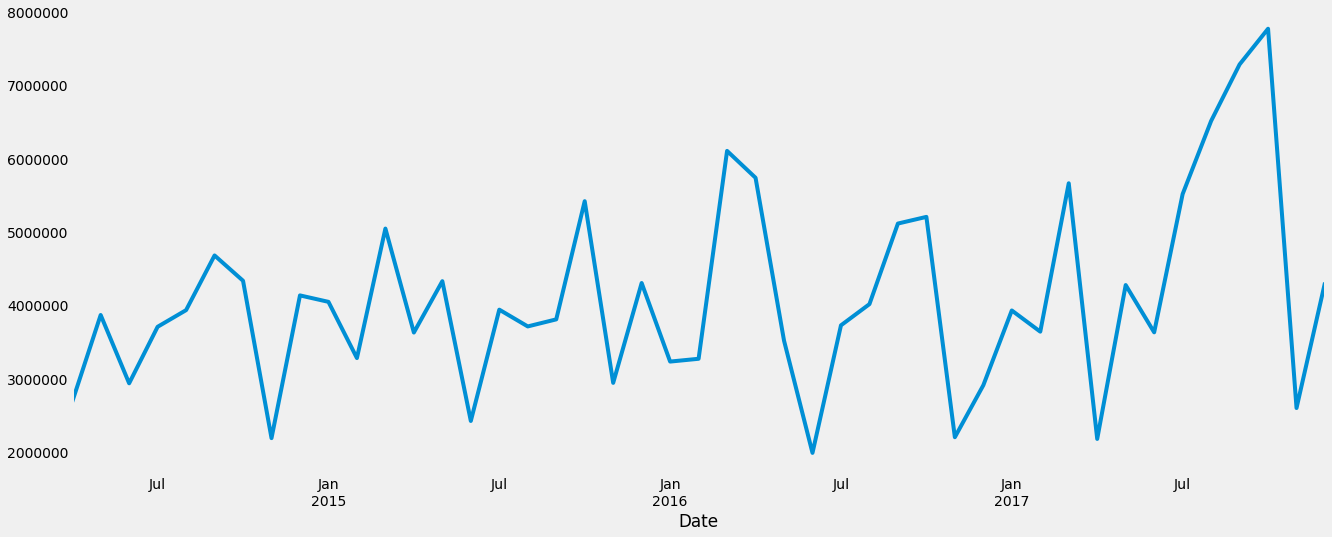

In [102]:
Mum_Mix['sales'].plot()
plt.grid();

In [103]:
Mum_Mix.sort_index(inplace= True)

In [104]:
Mum_Mix.head()

,product,city,sales
Date,,,
2014-04-01,Mixers,Mumbai,2679347
2014-05-01,Mixers,Mumbai,3864612
2014-06-01,Mixers,Mumbai,2932658
2014-07-01,Mixers,Mumbai,3703713
2014-08-01,Mixers,Mumbai,3931029


In [105]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

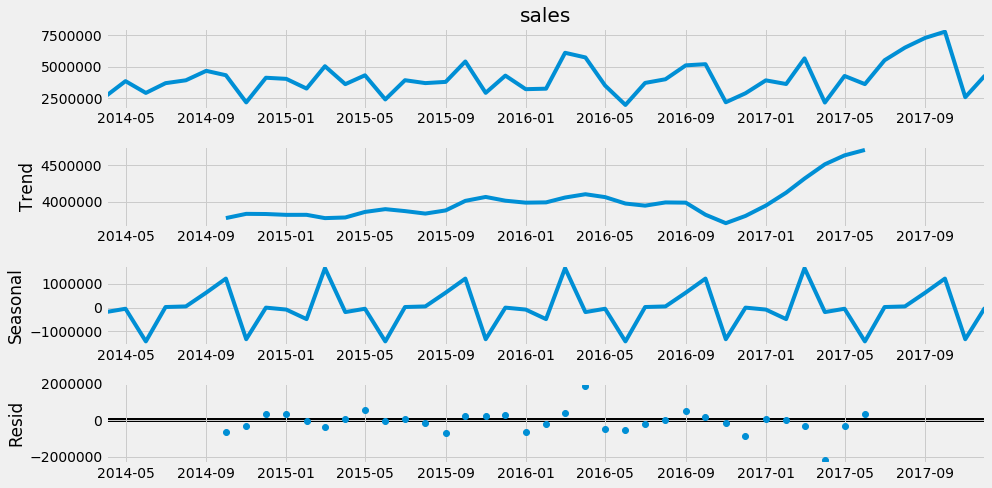

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Mum_Mix['sales'],model='additive')
decomposition.plot();

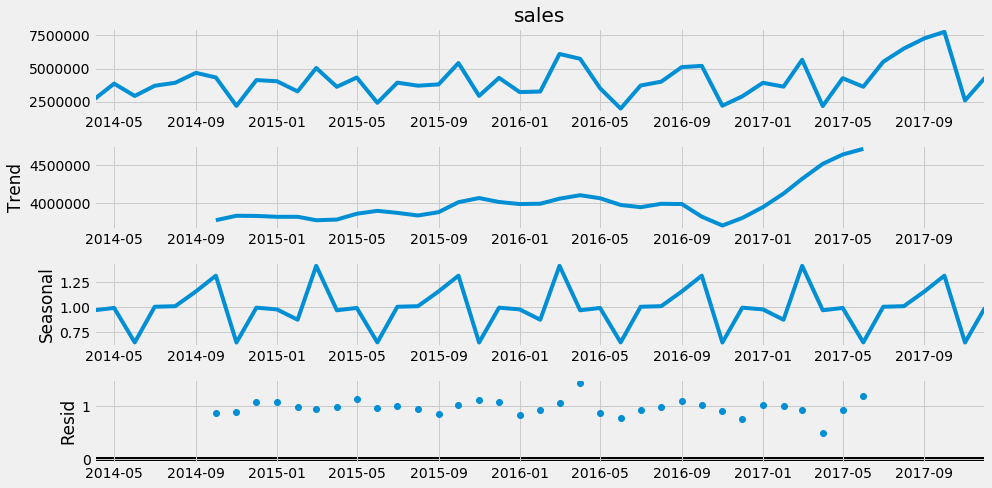

In [107]:
decomposition = seasonal_decompose(Mum_Mix['sales'],model='multiplicative')
decomposition.plot();

In [108]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    3.772852e+06
2014-11-01    3.831491e+06
2014-12-01    3.829299e+06
2015-01-01    3.817618e+06
2015-02-01    3.818088e+06
2015-03-01    3.772485e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    0.968444
2014-05-01    0.992045
2014-06-01    0.644632
2014-07-01    1.003866
2014-08-01    1.009729
2014-09-01    1.158388
2014-10-01    1.317413
2014-11-01    0.643651
2014-12-01    0.994618
2015-01-01    0.977359
2015-02-01    0.873129
2015-03-01    1.416726
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01    0.871491
2014-11-01    0.885889
2014-12-01    1.084855
2015-01-01    1.083826
2015-02-01    0.982962
2015-03-01    0.943723
Name: resid, 

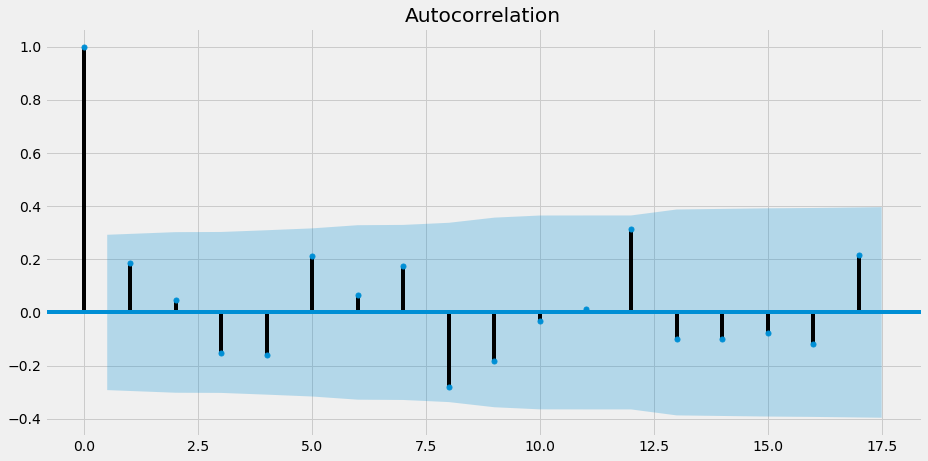

In [109]:
plot_acf(Mum_Mix['sales'])
#plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

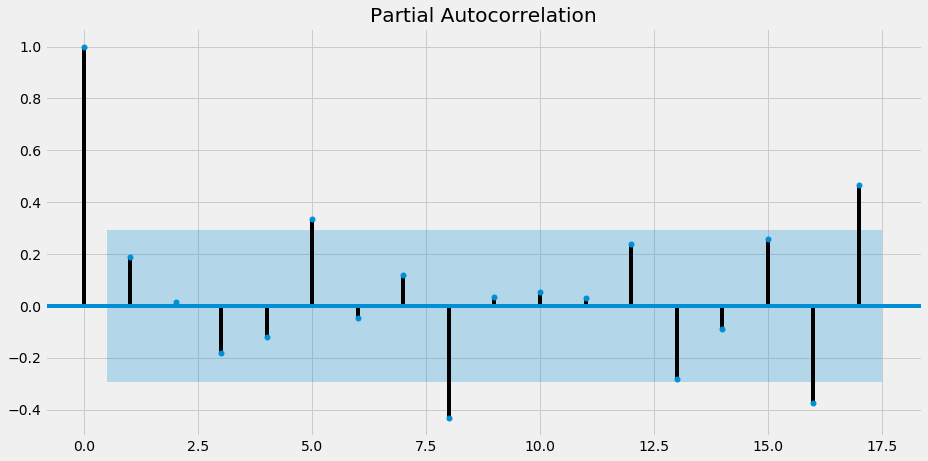

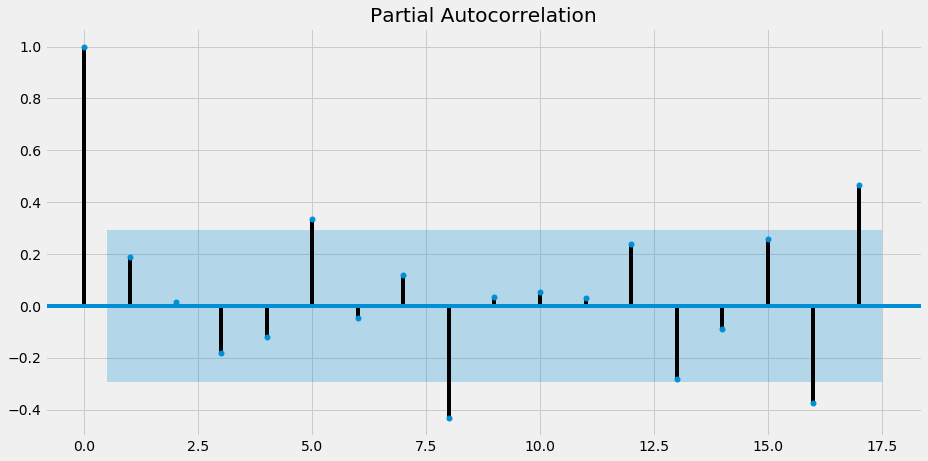

In [110]:
plot_pacf(Mum_Mix['sales'])

In [111]:
Mum_Mix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2014-04-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  45 non-null     object
 1   city     45 non-null     object
 2   sales    45 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


In [112]:
train    =   Mum_Mix[0:int(len(Mum_Mix)*0.7)] 
test     =   Mum_Mix[int(len(Mum_Mix)*0.7):]

In [113]:
train.shape

(31, 3)

In [114]:
test.shape

(14, 3)

In [115]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,Mixers,Mumbai,2679347
2014-05-01,Mixers,Mumbai,3864612
2014-06-01,Mixers,Mumbai,2932658
2014-07-01,Mixers,Mumbai,3703713
2014-08-01,Mixers,Mumbai,3931029


Last few rows of Training Data


,product,city,sales
Date,,,
2016-06-01,Mixers,Mumbai,1983288
2016-07-01,Mixers,Mumbai,3723448
2016-08-01,Mixers,Mumbai,4012728
2016-09-01,Mixers,Mumbai,5112100
2016-10-01,Mixers,Mumbai,5203170


First few rows of Test Data


,product,city,sales
Date,,,
2016-11-01,Mixers,Mumbai,2197132
2016-12-01,Mixers,Mumbai,2906503
2017-01-01,Mixers,Mumbai,3926367
2017-02-01,Mixers,Mumbai,3637237
2017-03-01,Mixers,Mumbai,5661553


Last few rows of Test Data


,product,city,sales
Date,,,
2017-08-01,Mixers,Mumbai,6511352
2017-09-01,Mixers,Mumbai,7282989
2017-10-01,Mixers,Mumbai,7769826
2017-11-01,Mixers,Mumbai,2595569
2017-12-01,Mixers,Mumbai,4306914


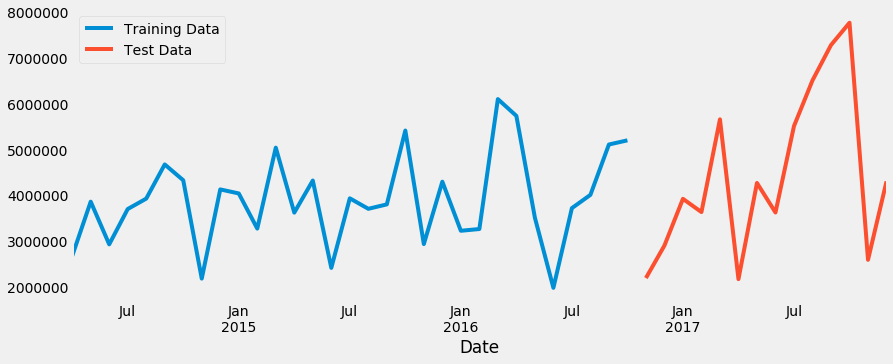

In [116]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [117]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146]


Linear

In [118]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [119]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
            product    city    sales  time
Date                                     
2014-04-01  Mixers  Mumbai  2679347     1
2014-05-01  Mixers  Mumbai  3864612     2
2014-06-01  Mixers  Mumbai  2932658     3
2014-07-01  Mixers  Mumbai  3703713     4
2014-08-01  Mixers  Mumbai  3931029     5 

Last few rows of Training Data 
            product    city    sales  time
Date                                     
2016-06-01  Mixers  Mumbai  1983288    27
2016-07-01  Mixers  Mumbai  3723448    28
2016-08-01  Mixers  Mumbai  4012728    29
2016-09-01  Mixers  Mumbai  5112100    30
2016-10-01  Mixers  Mumbai  5203170    31 

First few rows of Test Data 
            product    city    sales  time
Date                                     
2016-11-01  Mixers  Mumbai  2197132   133
2016-12-01  Mixers  Mumbai  2906503   134
2017-01-01  Mixers  Mumbai  3926367   135
2017-02-01  Mixers  Mumbai  3637237   136
2017-03-01  Mixers  Mumbai  5661553   137 

Last few rows o

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
lr = LinearRegression()

In [122]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['sales'].values)

LinearRegression()

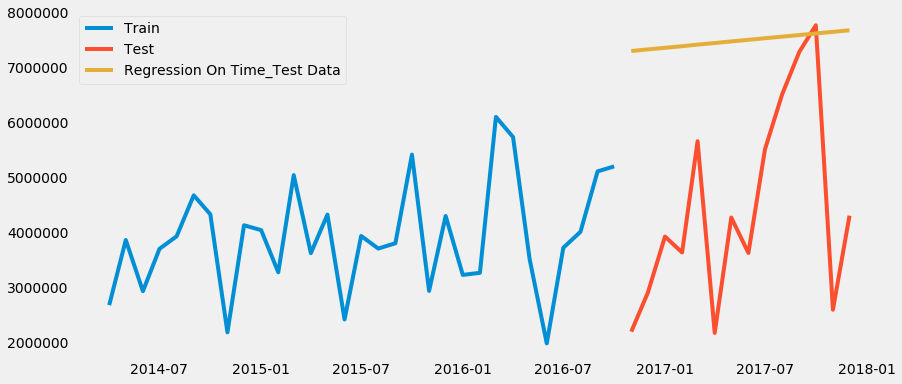

In [123]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [124]:
from sklearn import metrics

In [125]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3483887.626


In [126]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,3.483888e+06


Naive

In [127]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [128]:
NaiveModel_test['naive'] = np.asarray(train['sales'])[len(np.asarray(train['sales']))-1]
NaiveModel_test['naive'].head()

Date
2016-11-01    5203170
2016-12-01    5203170
2017-01-01    5203170
2017-02-01    5203170
2017-03-01    5203170
Name: naive, dtype: int64

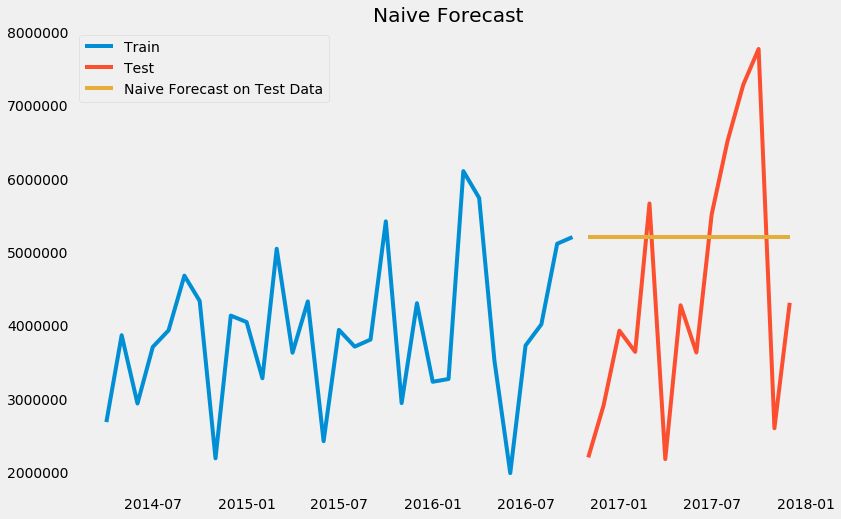

In [129]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [130]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1917030.070


In [131]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,3.483888e+06
NaiveModel,1.917030e+06


Simpleaverage

In [132]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [133]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2016-11-01,Mixers,Mumbai,2197132,3.908564e+06
2016-12-01,Mixers,Mumbai,2906503,3.908564e+06
2017-01-01,Mixers,Mumbai,3926367,3.908564e+06
2017-02-01,Mixers,Mumbai,3637237,3.908564e+06
2017-03-01,Mixers,Mumbai,5661553,3.908564e+06


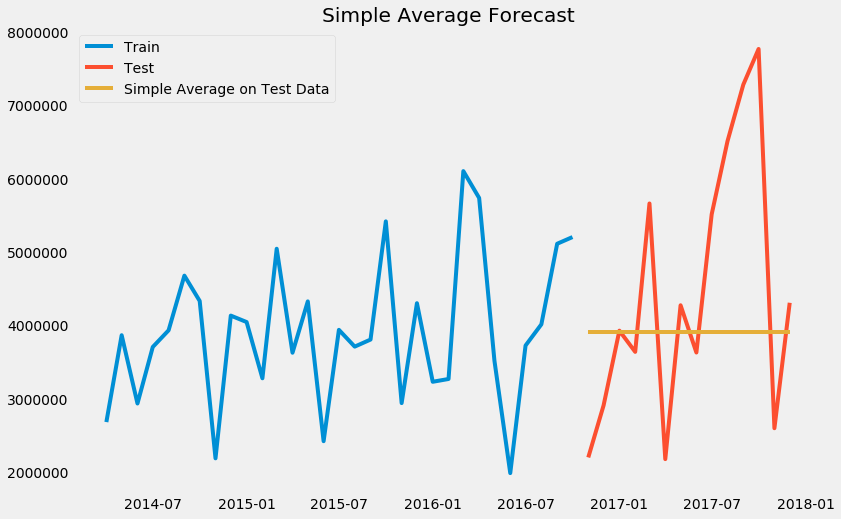

In [134]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [135]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1848392.101


In [136]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,3.483888e+06
NaiveModel,1.917030e+06
SimpleAverageModel,1.848392e+06


In [137]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [138]:
SES_train = train.copy()
SES_test = test.copy()

In [139]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

In [140]:
model_SES_autofit = model_SES.fit(optimized=True)

In [141]:
model_SES_autofit.params

{'smoothing_level': 0.16616279069767442,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2679347.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [142]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2016-11-01,Mixers,Mumbai,2197132,4.257784e+06
2016-12-01,Mixers,Mumbai,2906503,4.257784e+06
2017-01-01,Mixers,Mumbai,3926367,4.257784e+06
2017-02-01,Mixers,Mumbai,3637237,4.257784e+06
2017-03-01,Mixers,Mumbai,5661553,4.257784e+06


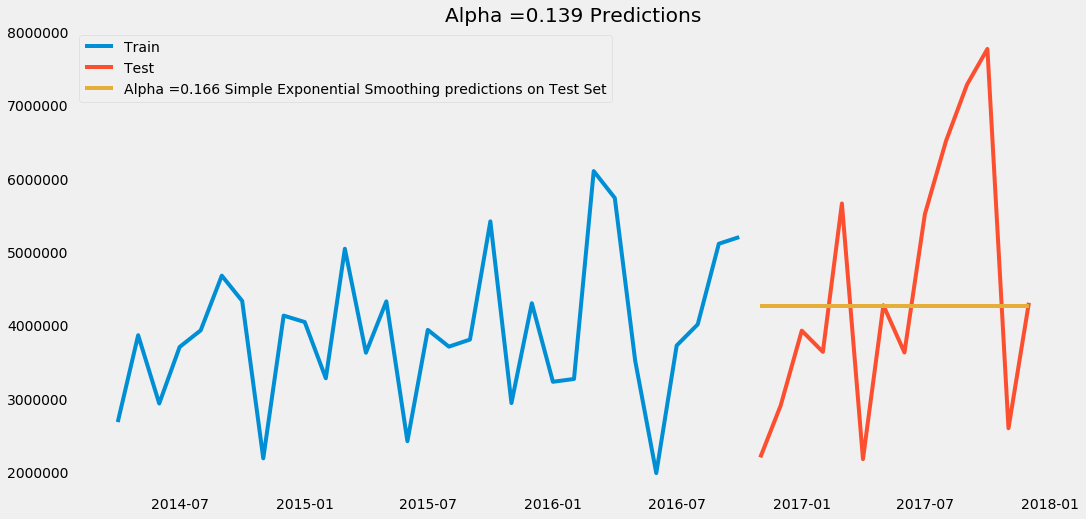

In [143]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.166 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.139 Predictions');

In [144]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.166 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.166 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1776547.953


In [145]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [146]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: 36.67590673841895


In [147]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.166,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,3.483888e+06,NaN
NaiveModel,1.917030e+06,NaN
SimpleAverageModel,1.848392e+06,NaN
"Alpha=0.166,SimpleExponentialSmoothing",1.776548e+06,36.675907


In [148]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [149]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [150]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
2,0.3,1.099480e+06,1.765755e+06
1,0.2,1.078670e+06,1.770631e+06
3,0.4,1.127456e+06,1.776566e+06
4,0.5,1.156709e+06,1.801164e+06
0,0.1,1.099490e+06,1.804896e+06
5,0.6,1.186518e+06,1.833623e+06
6,0.7,1.217941e+06,1.865975e+06
7,0.8,1.252782e+06,1.892048e+06
8,0.9,1.293140e+06,1.909116e+06


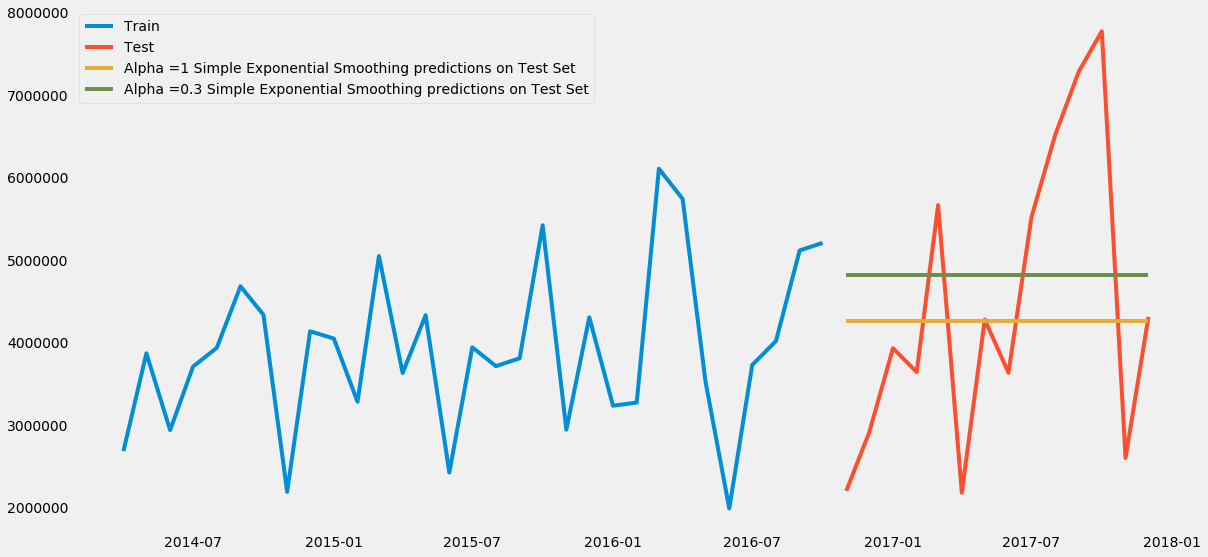

In [151]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.5], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [152]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.5])
print('\nMAPE:',mape)


MAPE: 44.94145962965238


In [153]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,3.483888e+06,NaN
NaiveModel,1.917030e+06,NaN
SimpleAverageModel,1.848392e+06,NaN
"Alpha=0.166,SimpleExponentialSmoothing",1.776548e+06,36.675907
"Alpha=0.1,SimpleExponentialSmoothing",1.765755e+06,44.941460


Double

In [154]:
DES_train = train.copy()
DES_test = test.copy()

In [155]:
model_DES = Holt(DES_train['sales'])

In [156]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [157]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [158]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,4.693694e+06,2.052917e+06
1,0.1,0.2,3.338588e+06,3.475184e+06
2,0.1,0.3,2.811192e+06,1.751605e+06
3,0.1,0.4,2.466319e+06,2.163610e+06
4,0.1,0.5,2.219575e+06,2.866925e+06
...,...,...,...,...
95,1.0,0.6,1.804304e+06,3.951221e+06
96,1.0,0.7,1.897570e+06,3.625996e+06
97,1.0,0.8,2.000851e+06,3.155264e+06
98,1.0,0.9,2.116836e+06,2.633521e+06


In [159]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
11,0.2,0.2,1.931373e+06,1.669173e+06
15,0.2,0.6,1.418444e+06,1.670300e+06
14,0.2,0.5,1.469070e+06,1.680825e+06
13,0.2,0.4,1.547722e+06,1.741131e+06
2,0.1,0.3,2.811192e+06,1.751605e+06


In [160]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.1,0.5])
print('\nMAPE:',mape)


MAPE: 75.28316972376416


In [161]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,3.483888e+06,NaN
NaiveModel,1.917030e+06,NaN
SimpleAverageModel,1.848392e+06,NaN
"Alpha=0.166,SimpleExponentialSmoothing",1.776548e+06,36.675907
"Alpha=0.1,SimpleExponentialSmoothing",1.765755e+06,44.941460
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",1.669173e+06,75.283170


In [162]:
TES_train = train.copy()
TES_test = test.copy()

In [163]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='multiplicative',initialization_method='estimated')

In [164]:
model_TES_autofit = model_TES.fit()

In [165]:
model_TES_autofit.params

{'smoothing_level': 0.005,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 3780901.2472222196,
 'initial_trend': 7969.555050505209,
 'initial_seasons': array([0.98177275, 1.14829247, 0.63565167, 1.04201186, 0.9902588 ,
        1.00451472, 1.17574059, 0.58392446, 1.10498116, 1.08477646,
        0.87890501, 1.36917006]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [166]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2016-11-01,Mixers,Mumbai,2197132,2.358338e+06
2016-12-01,Mixers,Mumbai,2906503,4.471442e+06
2017-01-01,Mixers,Mumbai,3926367,4.398222e+06
2017-02-01,Mixers,Mumbai,3637237,3.570587e+06
2017-03-01,Mixers,Mumbai,5661553,5.573317e+06


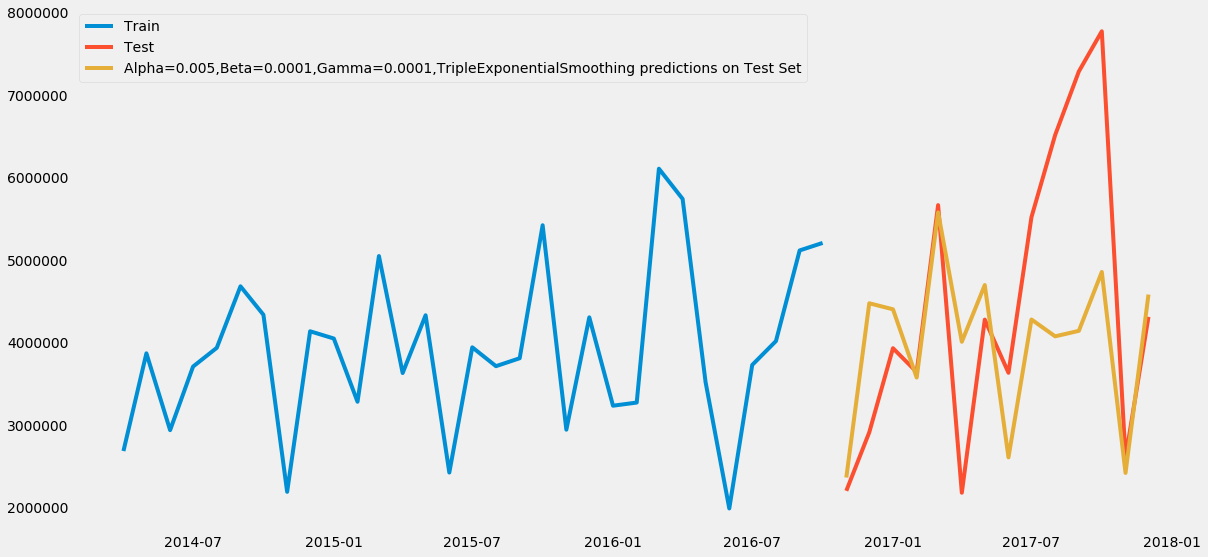

In [167]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [168]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.005,Beta=0.0001,Gamma=0.0001, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.005,Beta=0.0001,Gamma=0.0001, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 1542273.806


In [169]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: 25.202947961120394


In [170]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,3.483888e+06,NaN
NaiveModel,1.917030e+06,NaN
SimpleAverageModel,1.848392e+06,NaN
"Alpha=0.166,SimpleExponentialSmoothing",1.776548e+06,36.675907
"Alpha=0.1,SimpleExponentialSmoothing",1.765755e+06,44.941460
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",1.669173e+06,75.283170
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.542274e+06,25.202948


In [171]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [172]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [173]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,6.512836e+05,1.436355e+06
1,0.1,0.1,0.2,6.586561e+05,1.419482e+06
2,0.1,0.1,0.3,6.666213e+05,1.417097e+06
3,0.1,0.1,0.4,6.747525e+05,1.427314e+06
4,0.1,0.1,0.5,6.828242e+05,1.448002e+06
...,...,...,...,...,...
995,1.0,1.0,0.6,3.946907e+06,3.915906e+07
996,1.0,1.0,0.7,3.194103e+07,4.039300e+08
997,1.0,1.0,0.8,1.058148e+07,6.242573e+07
998,1.0,1.0,0.9,8.497760e+06,9.360125e+07


In [174]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
194,0.2,1.0,0.5,953316.928764,9.408199e+05
182,0.2,0.9,0.3,903037.089733,1.003810e+06
195,0.2,1.0,0.6,959870.343036,1.021480e+06
254,0.3,0.6,0.5,932535.410084,1.030526e+06
193,0.2,1.0,0.4,941355.201880,1.036714e+06


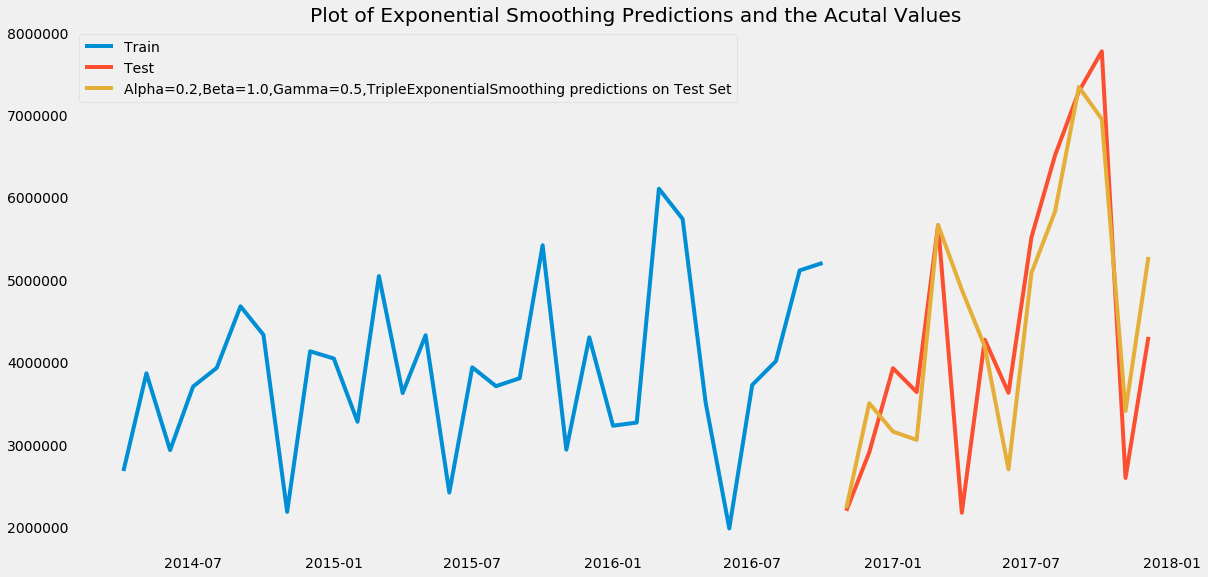

In [175]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.2000000000000000, 1.0000000000000000, 0.5], label='Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [176]:
fullmodel1 = ExponentialSmoothing(Mum_Mix['sales'],
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.2,
                                                                 smoothing_slope=1.0,
                                                                 smoothing_seasonal=0.5)

In [177]:
RMSE_fullmodel1 = metrics.mean_squared_error(Mum_Mix['sales'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 1159739.0700252817


In [178]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=24)

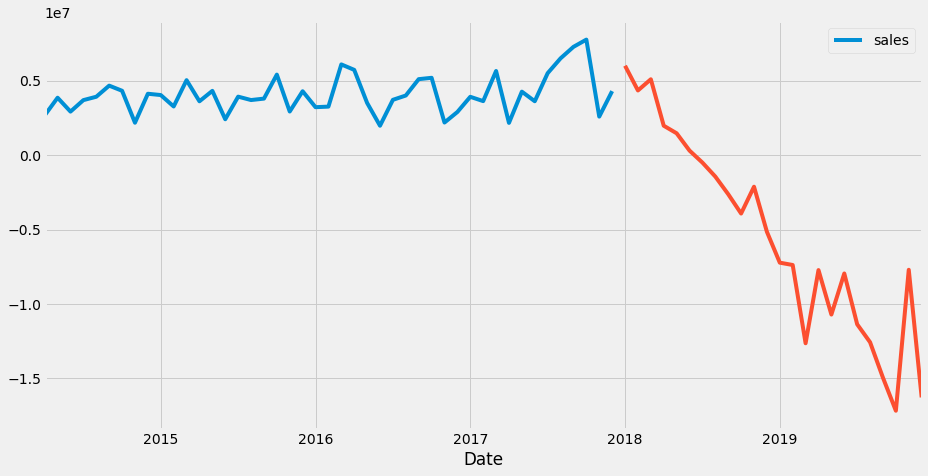

In [179]:
Mum_Mix.plot()
prediction_1.plot();

In [180]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
2018-01-01,3.736235e+06,6.014243e+06,8.292251e+06
2018-02-01,2.074762e+06,4.352770e+06,6.630777e+06
2018-03-01,2.827333e+06,5.105341e+06,7.383349e+06
2018-04-01,-2.947428e+05,1.983265e+06,4.261273e+06
2018-05-01,-8.026753e+05,1.475332e+06,3.753340e+06


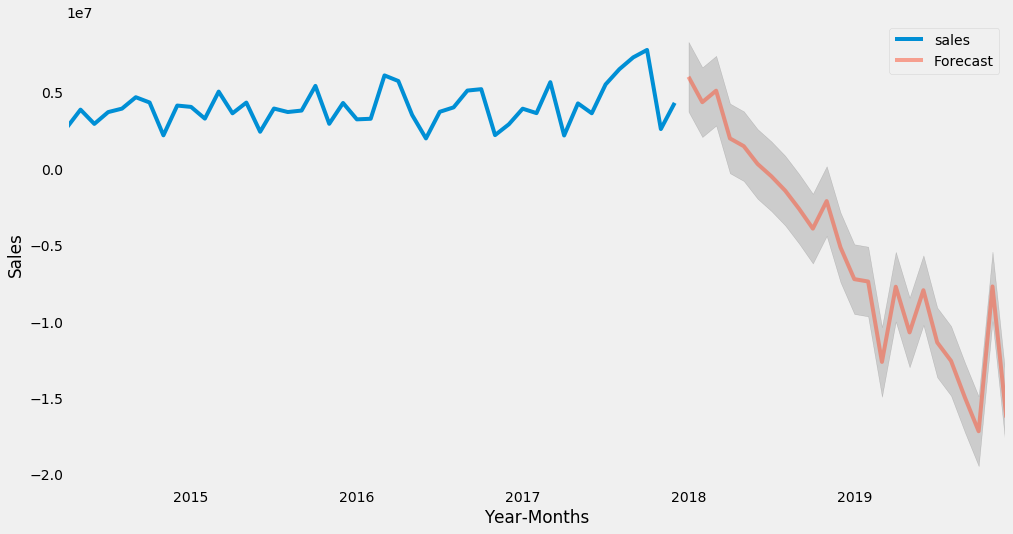

In [181]:
# plot the forecast along with the confidence band

axis = Mum_Mix.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [182]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.2,1.0,0.5])
print('\nMAPE:',mape)


MAPE: 20.91878294695528


In [183]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,3.483888e+06,NaN
NaiveModel,1.917030e+06,NaN
SimpleAverageModel,1.848392e+06,NaN
"Alpha=0.166,SimpleExponentialSmoothing",1.776548e+06,36.675907
"Alpha=0.1,SimpleExponentialSmoothing",1.765755e+06,44.941460
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",1.669173e+06,75.283170
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.542274e+06,25.202948
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",9.408199e+05,20.918783


In [184]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",9.408199e+05,20.918783
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.542274e+06,25.202948
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",1.669173e+06,75.283170
"Alpha=0.1,SimpleExponentialSmoothing",1.765755e+06,44.941460
"Alpha=0.166,SimpleExponentialSmoothing",1.776548e+06,36.675907
SimpleAverageModel,1.848392e+06,NaN
NaiveModel,1.917030e+06,NaN
RegressionOnTime,3.483888e+06,NaN


In [185]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

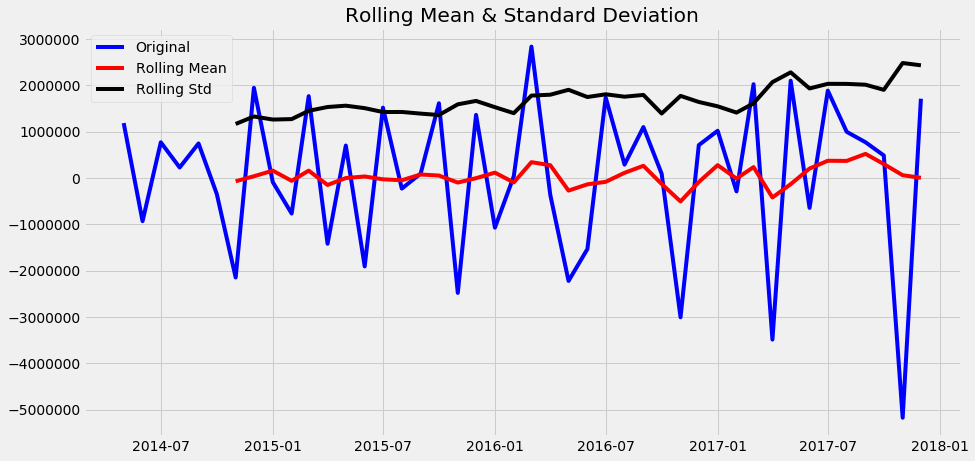

Results of Dickey-Fuller Test:
Test Statistic                 -2.669133
p-value                         0.079534
#Lags Used                      6.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 



In [186]:
test_stationarity(Mum_Mix['sales'].diff().dropna())

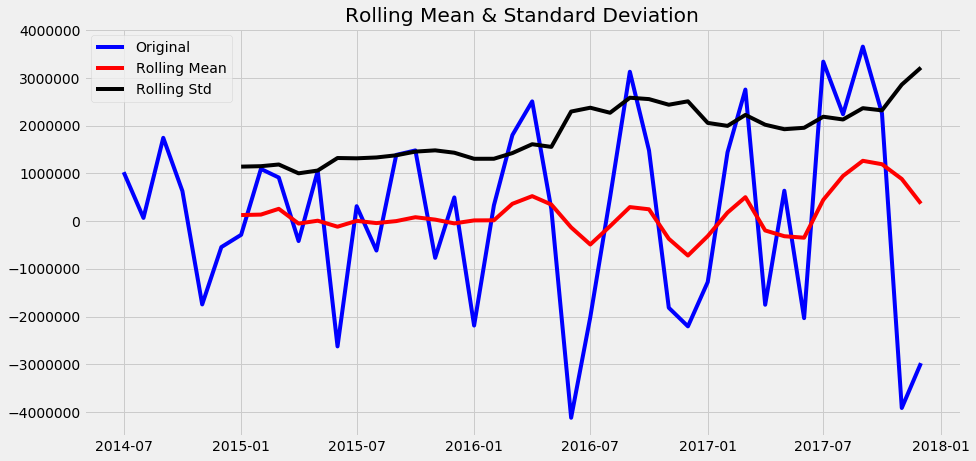

Results of Dickey-Fuller Test:
Test Statistic                 -2.976985
p-value                         0.037100
#Lags Used                      8.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64 



In [187]:
test_stationarity(Mum_Mix['sales'].diff(periods=3).dropna())

In [188]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(3,4)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 3, 1)
Model: (0, 3, 2)
Model: (1, 3, 0)
Model: (1, 3, 1)
Model: (1, 3, 2)
Model: (2, 3, 0)
Model: (2, 3, 1)
Model: (2, 3, 2)


In [189]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [190]:
Mum_Mix =Mum_Mix[~Mum_Mix.isin([np.nan, np.inf, -np.inf]).any(1)]

In [191]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [192]:
test.dropna(inplace=True)

In [193]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [194]:
from statsmodels.tsa.stattools import adfuller

In [195]:
dftest = adfuller(Mum_Mix['sales'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.272
DF test p-value is 0.07103119183207848
Number of lags used 10


In [196]:
dftest = adfuller(train['sales'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.263
DF test p-value is 0.0035855956720635715
Number of lags used 5


In [197]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(3,4)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 3, 0)
Model: (0, 3, 1)
Model: (0, 3, 2)
Model: (0, 3, 3)
Model: (1, 3, 0)
Model: (1, 3, 1)
Model: (1, 3, 2)
Model: (1, 3, 3)
Model: (2, 3, 0)
Model: (2, 3, 1)
Model: (2, 3, 2)
Model: (2, 3, 3)
Model: (3, 3, 0)
Model: (3, 3, 1)
Model: (3, 3, 2)
Model: (3, 3, 3)


In [198]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [199]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 3, 0) - AIC:935.4979136720843
ARIMA(0, 3, 1) - AIC:909.5302702263131
ARIMA(0, 3, 2) - AIC:905.6979831611491
ARIMA(0, 3, 3) - AIC:911.0578992065562
ARIMA(1, 3, 0) - AIC:916.9407435523555
ARIMA(1, 3, 1) - AIC:899.1320725563359
ARIMA(1, 3, 2) - AIC:891.5746492432384
ARIMA(1, 3, 3) - AIC:891.659480162587
ARIMA(2, 3, 0) - AIC:905.4225401757129
ARIMA(2, 3, 1) - AIC:896.3992315340349
ARIMA(2, 3, 2) - AIC:892.5612935582791
ARIMA(2, 3, 3) - AIC:884.0619680235177
ARIMA(3, 3, 0) - AIC:905.5390561959831
ARIMA(3, 3, 1) - AIC:897.924104837153
ARIMA(3, 3, 2) - AIC:893.5472951609204
ARIMA(3, 3, 3) - AIC:885.4054537909935


In [200]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 3, 3)",884.061968
15,"(3, 3, 3)",885.405454
6,"(1, 3, 2)",891.574649
7,"(1, 3, 3)",891.659480
10,"(2, 3, 2)",892.561294


In [201]:
auto_ARIMA = ARIMA(train['sales'], order=(2,3,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   31
Model:                 ARIMA(2, 3, 3)   Log Likelihood                -436.031
Date:                Sat, 11 Sep 2021   AIC                            884.062
Time:                        12:24:19   BIC                            892.055
Sample:                    04-01-2014   HQIC                           886.506
                         - 10-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1761      0.289     -4.067      0.000      -1.743      -0.609
ar.L2         -0.4312      0.328     -1.315      0.188      -1.074       0.211
ma.L1         -0.9837      0.472     -2.084      0.0

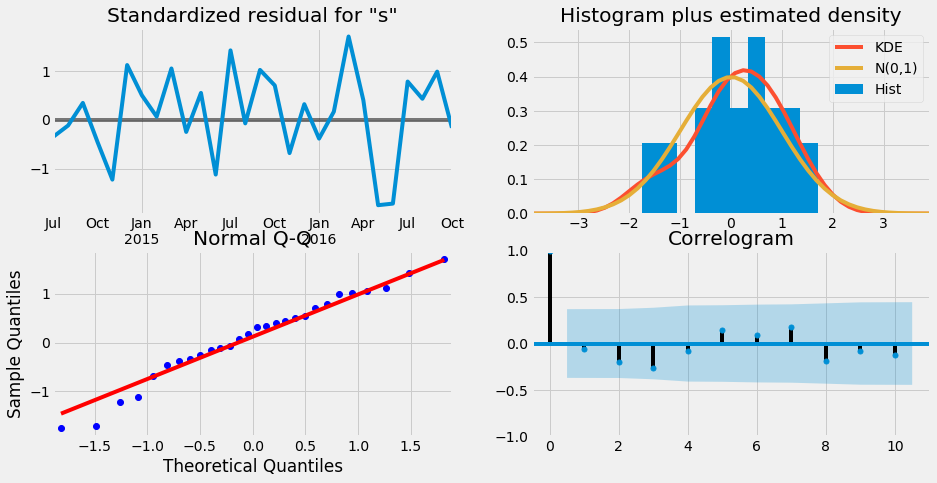

In [202]:
results_auto_ARIMA.plot_diagnostics();

In [203]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [204]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [205]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4831495.161023501 
MAPE: 118.31409329241515


In [206]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(2,0,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,3.483888e+06,NaN
NaiveModel,1.917030e+06,NaN
SimpleAverageModel,1.848392e+06,NaN
"Alpha=0.166,SimpleExponentialSmoothing",1.776548e+06,36.675907
"Alpha=0.1,SimpleExponentialSmoothing",1.765755e+06,44.941460
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",1.669173e+06,75.283170
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.542274e+06,25.202948
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",9.408199e+05,20.918783
"ARIMA(2,0,2)",2.091878e+01,118.314093


In [158]:
import itertools
p = q = range(0, 4)
d= range(3,4)
D = range(3,4)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 3, 1)(0, 3, 1, 12)
Model: (0, 3, 2)(0, 3, 2, 12)
Model: (0, 3, 3)(0, 3, 3, 12)
Model: (1, 3, 0)(1, 3, 0, 12)
Model: (1, 3, 1)(1, 3, 1, 12)
Model: (1, 3, 2)(1, 3, 2, 12)
Model: (1, 3, 3)(1, 3, 3, 12)
Model: (2, 3, 0)(2, 3, 0, 12)
Model: (2, 3, 1)(2, 3, 1, 12)
Model: (2, 3, 2)(2, 3, 2, 12)
Model: (2, 3, 3)(2, 3, 3, 12)
Model: (3, 3, 0)(3, 3, 0, 12)
Model: (3, 3, 1)(3, 3, 1, 12)
Model: (3, 3, 2)(3, 3, 2, 12)
Model: (3, 3, 3)(3, 3, 3, 12)


In [159]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [160]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 3, 0)x(0, 3, 0, 12)12 - AIC:2.0
SARIMA(0, 3, 0)x(0, 3, 1, 12)12 - AIC:4.0
SARIMA(0, 3, 0)x(0, 3, 2, 12)12 - AIC:6.0
SARIMA(0, 3, 0)x(0, 3, 3, 12)12 - AIC:8.0
SARIMA(0, 3, 0)x(1, 3, 0, 12)12 - AIC:4.0
SARIMA(0, 3, 0)x(1, 3, 1, 12)12 - AIC:6.0
SARIMA(0, 3, 0)x(1, 3, 2, 12)12 - AIC:8.0
SARIMA(0, 3, 0)x(1, 3, 3, 12)12 - AIC:10.0
SARIMA(0, 3, 0)x(2, 3, 0, 12)12 - AIC:6.0
SARIMA(0, 3, 0)x(2, 3, 1, 12)12 - AIC:8.0
SARIMA(0, 3, 0)x(2, 3, 2, 12)12 - AIC:10.0
SARIMA(0, 3, 0)x(2, 3, 3, 12)12 - AIC:12.0
SARIMA(0, 3, 0)x(3, 3, 0, 12)12 - AIC:8.0
SARIMA(0, 3, 0)x(3, 3, 1, 12)12 - AIC:10.0
SARIMA(0, 3, 0)x(3, 3, 2, 12)12 - AIC:12.0
SARIMA(0, 3, 0)x(3, 3, 3, 12)12 - AIC:14.0
SARIMA(0, 3, 1)x(0, 3, 0, 12)12 - AIC:4.0
SARIMA(0, 3, 1)x(0, 3, 1, 12)12 - AIC:6.0
SARIMA(0, 3, 1)x(0, 3, 2, 12)12 - AIC:8.0
SARIMA(0, 3, 1)x(0, 3, 3, 12)12 - AIC:10.0
SARIMA(0, 3, 1)x(1, 3, 0, 12)12 - AIC:6.0
SARIMA(0, 3, 1)x(1, 3, 1, 12)12 - AIC:8.0
SARIMA(0, 3, 1)x(1, 3, 2, 12)12 - AIC:10.0
SARIMA(0, 3, 1)x(1, 3, 3, 

SARIMA(3, 3, 0)x(0, 3, 1, 12)12 - AIC:10.0
SARIMA(3, 3, 0)x(0, 3, 2, 12)12 - AIC:12.0
SARIMA(3, 3, 0)x(0, 3, 3, 12)12 - AIC:14.0
SARIMA(3, 3, 0)x(1, 3, 0, 12)12 - AIC:10.0
SARIMA(3, 3, 0)x(1, 3, 1, 12)12 - AIC:12.0
SARIMA(3, 3, 0)x(1, 3, 2, 12)12 - AIC:14.0
SARIMA(3, 3, 0)x(1, 3, 3, 12)12 - AIC:16.0
SARIMA(3, 3, 0)x(2, 3, 0, 12)12 - AIC:12.0
SARIMA(3, 3, 0)x(2, 3, 1, 12)12 - AIC:14.0
SARIMA(3, 3, 0)x(2, 3, 2, 12)12 - AIC:16.0
SARIMA(3, 3, 0)x(2, 3, 3, 12)12 - AIC:18.0
SARIMA(3, 3, 0)x(3, 3, 0, 12)12 - AIC:14.0
SARIMA(3, 3, 0)x(3, 3, 1, 12)12 - AIC:16.0
SARIMA(3, 3, 0)x(3, 3, 2, 12)12 - AIC:18.0
SARIMA(3, 3, 0)x(3, 3, 3, 12)12 - AIC:20.0
SARIMA(3, 3, 1)x(0, 3, 0, 12)12 - AIC:10.0
SARIMA(3, 3, 1)x(0, 3, 1, 12)12 - AIC:12.0
SARIMA(3, 3, 1)x(0, 3, 2, 12)12 - AIC:14.0
SARIMA(3, 3, 1)x(0, 3, 3, 12)12 - AIC:16.0
SARIMA(3, 3, 1)x(1, 3, 0, 12)12 - AIC:12.0
SARIMA(3, 3, 1)x(1, 3, 1, 12)12 - AIC:14.0
SARIMA(3, 3, 1)x(1, 3, 2, 12)12 - AIC:16.0
SARIMA(3, 3, 1)x(1, 3, 3, 12)12 - AIC:18.0
SARIMA(3, 3

In [161]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
0,"(0, 3, 0)","(0, 3, 0, 12)",2.0
1,"(0, 3, 0)","(0, 3, 1, 12)",4.0
4,"(0, 3, 0)","(1, 3, 0, 12)",4.0
64,"(1, 3, 0)","(0, 3, 0, 12)",4.0
16,"(0, 3, 1)","(0, 3, 0, 12)",4.0


In [165]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0, 3, 0),
                                seasonal_order=(0, 3, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   31
Model:             SARIMAX(0, 3, 0)x(0, 3, 0, 12)   Log Likelihood                   0.000
Date:                            Sun, 22 Aug 2021   AIC                              2.000
Time:                                    12:16:13   BIC                                nan
Sample:                                04-01-2014   HQIC                               nan
                                     - 10-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10          0        inf      0.000       1e-10       1e-10
Ljung-Box (L1) (Q):                

In [166]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [167]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2016-11-01,-8.669298e+06,707.106781,-8.670684e+06,-8.667912e+06
2016-12-01,-2.551448e+07,2236.067977,-2.551886e+07,-2.551009e+07
2017-01-01,-5.182914e+07,4795.831523,-5.183854e+07,-5.181974e+07
2017-02-01,-8.078670e+07,8544.003745,-8.080344e+07,-8.076995e+07
2017-03-01,-1.129866e+08,13619.838472,-1.130133e+08,-1.129599e+08


In [168]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1.4933339099063805e+17 
MAPE: 6970.805529486797


In [169]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,3,0)(0,3,0)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,3.483888e+06,NaN
NaiveModel,1.917030e+06,NaN
SimpleAverageModel,1.848392e+06,NaN
"Alpha=0.166,SimpleExponentialSmoothing",1.776548e+06,36.675907
"Alpha=0.1,SimpleExponentialSmoothing",1.765755e+06,36.675907
"Alpha=0.1,SimpleExponentialSmoothing",1.765755e+06,44.941460
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",1.669173e+06,75.283170
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.542274e+06,25.202948
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",9.408199e+05,20.918783
"ARIMA(2,0,2)",2.091878e+01,118.314093


In [170]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [171]:
Mum_Mix.head()

,product,city,sales
Date,,,
2014-04-01,Mixers,Mumbai,2679347
2014-05-01,Mixers,Mumbai,3864612
2014-06-01,Mixers,Mumbai,2932658
2014-07-01,Mixers,Mumbai,3703713
2014-08-01,Mixers,Mumbai,3931029


In [172]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(Mum_Mix1['date'])
df_prophet['y'] = Mum_Mix1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-08-01,2017-08-01,6511352
2017-09-01,2017-09-01,7282989
2017-10-01,2017-10-01,7769826
2017-11-01,2017-11-01,2595569
2017-12-01,2017-12-01,4306914


In [173]:
df_prophet.shape

(45, 2)

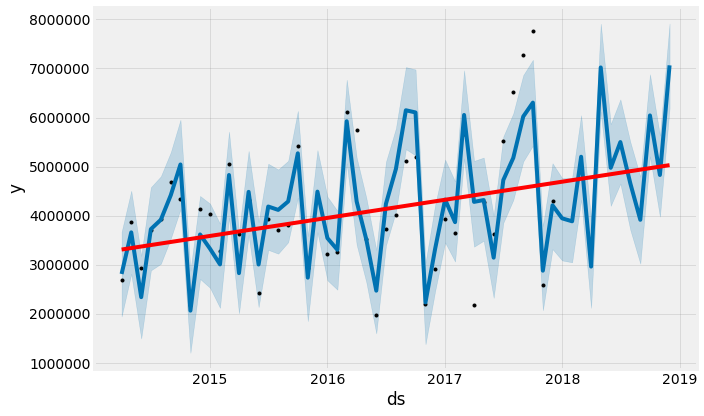

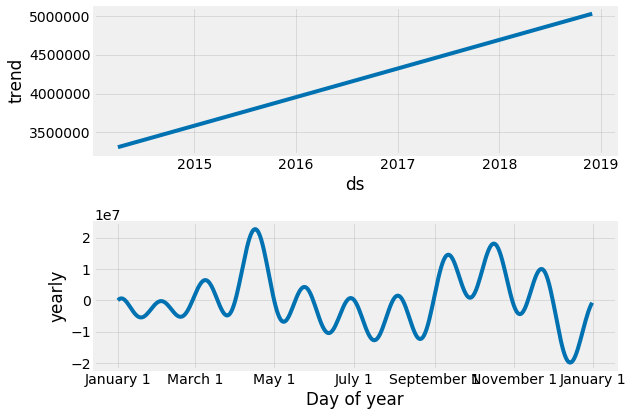

In [174]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [175]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,3.310131e+06,1.947495e+06,3.668695e+06,3.310131e+06,3.310131e+06,-4.976203e+05,-4.976203e+05,-4.976203e+05,-4.976203e+05,-4.976203e+05,-4.976203e+05,0.0,0.0,0.0,2.812511e+06
1,2014-05-01,3.340362e+06,2.815592e+06,4.507103e+06,3.340362e+06,3.340362e+06,3.197961e+05,3.197961e+05,3.197961e+05,3.197961e+05,3.197961e+05,3.197961e+05,0.0,0.0,0.0,3.660158e+06
2,2014-06-01,3.371600e+06,1.497245e+06,3.181237e+06,3.371600e+06,3.371600e+06,-1.031403e+06,-1.031403e+06,-1.031403e+06,-1.031403e+06,-1.031403e+06,-1.031403e+06,0.0,0.0,0.0,2.340197e+06
3,2014-07-01,3.401831e+06,2.885603e+06,4.579315e+06,3.401831e+06,3.401831e+06,3.236028e+05,3.236028e+05,3.236028e+05,3.236028e+05,3.236028e+05,3.236028e+05,0.0,0.0,0.0,3.725434e+06
4,2014-08-01,3.433069e+06,3.019585e+06,4.801444e+06,3.433069e+06,3.433069e+06,4.838217e+05,4.838217e+05,4.838217e+05,4.838217e+05,4.838217e+05,4.838217e+05,0.0,0.0,0.0,3.916891e+06
5,2014-09-01,3.464308e+06,3.537283e+06,5.293834e+06,3.464308e+06,3.464308e+06,9.543618e+05,9.543618e+05,9.543618e+05,9.543618e+05,9.543618e+05,9.543618e+05,0.0,0.0,0.0,4.418670e+06
6,2014-10-01,3.494538e+06,4.131904e+06,5.953898e+06,3.494538e+06,3.494538e+06,1.548803e+06,1.548803e+06,1.548803e+06,1.548803e+06,1.548803e+06,1.548803e+06,0.0,0.0,0.0,5.043341e+06
7,2014-11-01,3.525777e+06,1.205469e+06,2.881615e+06,3.525777e+06,3.525777e+06,-1.460722e+06,-1.460722e+06,-1.460722e+06,-1.460722e+06,-1.460722e+06,-1.460722e+06,0.0,0.0,0.0,2.065055e+06
8,2014-12-01,3.556007e+06,2.711170e+06,4.401847e+06,3.556007e+06,3.556007e+06,6.134955e+04,6.134955e+04,6.134955e+04,6.134955e+04,6.134955e+04,6.134955e+04,0.0,0.0,0.0,3.617357e+06
9,2015-01-01,3.587246e+06,2.530546e+06,4.244935e+06,3.587246e+06,3.587246e+06,-2.609997e+05,-2.609997e+05,-2.609997e+05,-2.609997e+05,-2.609997e+05,-2.609997e+05,0.0,0.0,0.0,3.326246e+06


In [176]:
rmse = mean_squared_error(test['sales'],forecast.tail(14)['yhat'])
print(rmse)

3054997829596.333


In [177]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,3.483888e+06,NaN
NaiveModel,1.917030e+06,NaN
SimpleAverageModel,1.848392e+06,NaN
"Alpha=0.166,SimpleExponentialSmoothing",1.776548e+06,36.675907
"Alpha=0.1,SimpleExponentialSmoothing",1.765755e+06,36.675907
"Alpha=0.1,SimpleExponentialSmoothing",1.765755e+06,44.941460
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",1.669173e+06,75.283170
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.542274e+06,25.202948
"Alpha=0.2,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",9.408199e+05,20.918783
"ARIMA(2,0,2)",2.091878e+01,118.314093


In [178]:
import fbprophet

In [179]:
m = fbprophet.Prophet()

In [180]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [181]:
future = m.make_future_dataframe(periods=365)

In [182]:
forecast = m.predict(future)

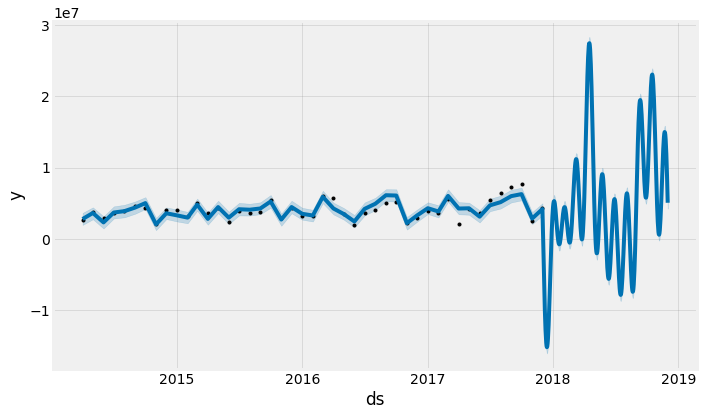

In [183]:
m.plot(forecast);

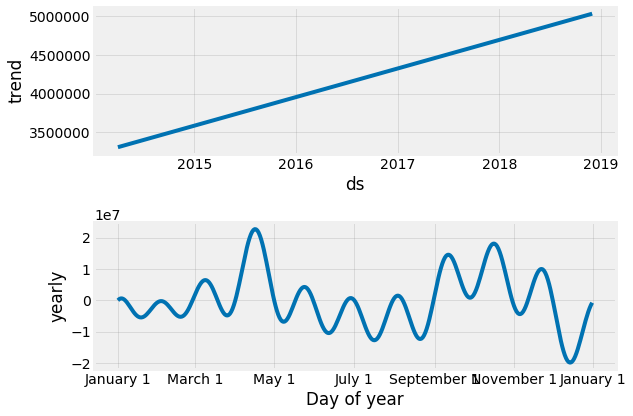

In [184]:
m.plot_components(forecast);

In [185]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,2679347
2014-05-01,2014-05-01,3864612
2014-06-01,2014-06-01,2932658
2014-07-01,2014-07-01,3703713
2014-08-01,2014-08-01,3931029


In [186]:
future.tail()

,ds
405,2018-11-27
406,2018-11-28
407,2018-11-29
408,2018-11-30
409,2018-12-01


In [187]:
predict=m.predict(future)

In [188]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,3.310131e+06,1.975958e+06,3.724587e+06,3.310131e+06,3.310131e+06,-4.976203e+05,-4.976203e+05,-4.976203e+05,-4.976203e+05,-4.976203e+05,-4.976203e+05,0.0,0.0,0.0,2.812511e+06
1,2014-05-01,3.340362e+06,2.764530e+06,4.480085e+06,3.340362e+06,3.340362e+06,3.197961e+05,3.197961e+05,3.197961e+05,3.197961e+05,3.197961e+05,3.197961e+05,0.0,0.0,0.0,3.660158e+06
2,2014-06-01,3.371600e+06,1.498235e+06,3.191452e+06,3.371600e+06,3.371600e+06,-1.031403e+06,-1.031403e+06,-1.031403e+06,-1.031403e+06,-1.031403e+06,-1.031403e+06,0.0,0.0,0.0,2.340197e+06
3,2014-07-01,3.401831e+06,2.916496e+06,4.618921e+06,3.401831e+06,3.401831e+06,3.236028e+05,3.236028e+05,3.236028e+05,3.236028e+05,3.236028e+05,3.236028e+05,0.0,0.0,0.0,3.725434e+06
4,2014-08-01,3.433069e+06,3.059233e+06,4.761439e+06,3.433069e+06,3.433069e+06,4.838217e+05,4.838217e+05,4.838217e+05,4.838217e+05,4.838217e+05,4.838217e+05,0.0,0.0,0.0,3.916891e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,2018-11-27,5.026679e+06,1.108752e+07,1.282047e+07,5.026580e+06,5.026777e+06,6.908176e+06,6.908176e+06,6.908176e+06,6.908176e+06,6.908176e+06,6.908176e+06,0.0,0.0,0.0,1.193485e+07
406,2018-11-28,5.027689e+06,9.722538e+06,1.137608e+07,5.027590e+06,5.027788e+06,5.492365e+06,5.492365e+06,5.492365e+06,5.492365e+06,5.492365e+06,5.492365e+06,0.0,0.0,0.0,1.052005e+07
407,2018-11-29,5.028699e+06,8.007401e+06,9.773845e+06,5.028600e+06,5.028799e+06,3.856496e+06,3.856496e+06,3.856496e+06,3.856496e+06,3.856496e+06,3.856496e+06,0.0,0.0,0.0,8.885196e+06
408,2018-11-30,5.029710e+06,6.230771e+06,7.930664e+06,5.029610e+06,5.029810e+06,2.033517e+06,2.033517e+06,2.033517e+06,2.033517e+06,2.033517e+06,2.033517e+06,0.0,0.0,0.0,7.063226e+06


In [189]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,2.812511e+06,1.975958e+06,3.724587e+06
1,2014-05-01,3.660158e+06,2.764530e+06,4.480085e+06
2,2014-06-01,2.340197e+06,1.498235e+06,3.191452e+06
3,2014-07-01,3.725434e+06,2.916496e+06,4.618921e+06
4,2014-08-01,3.916891e+06,3.059233e+06,4.761439e+06


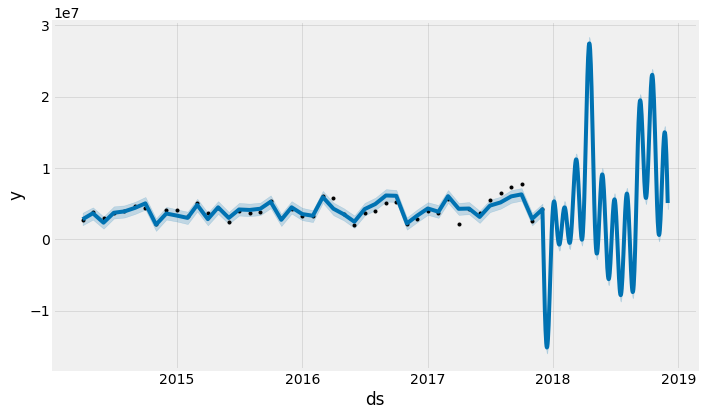

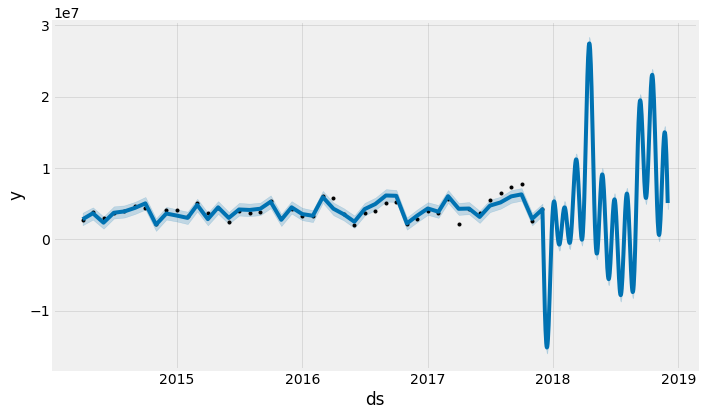

In [190]:
m.plot(predict)

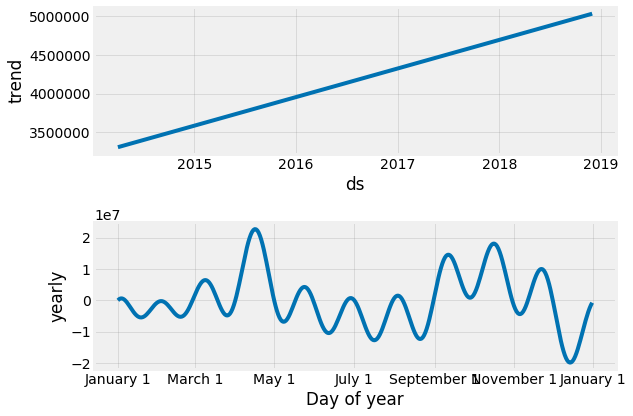

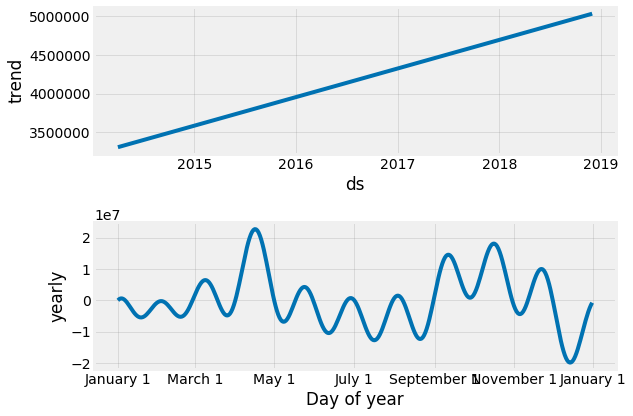

In [191]:
m.plot_components(predict)

In [192]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-06-04 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


In [193]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-07-01,3.374460e+06,3.000369e+06,3.737747e+06,3723448,2016-06-04
1,2016-08-01,5.062045e+06,4.710335e+06,5.439941e+06,4012728,2016-06-04
2,2016-09-01,7.564617e+06,7.191790e+06,7.961353e+06,5112100,2016-06-04
3,2016-10-01,3.469792e+06,3.092197e+06,3.832882e+06,5203170,2016-06-04
4,2016-11-01,1.709103e+06,1.323856e+06,2.089620e+06,2197132,2016-06-04


In [194]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,1.608552e+12,1.268287e+06,1.054169e+06,0.270907,0.270907,0.5
1,58 days,2.098188e+12,1.448512e+06,1.404333e+06,0.354791,0.354791,0.0
2,62 days,1.986071e+12,1.409280e+06,1.371871e+06,0.363676,0.363676,0.0
3,89 days,4.442957e+12,2.107832e+06,2.073471e+06,0.472801,0.472801,0.0
4,90 days,3.028686e+12,1.740312e+06,1.329378e+06,0.258088,0.258088,0.5


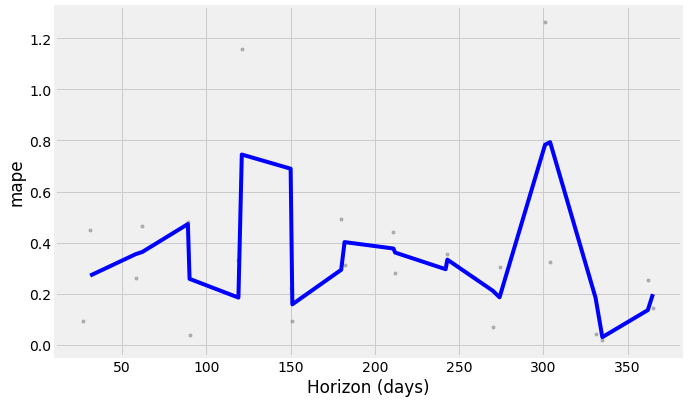

In [195]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [79]:
    from statsmodels.tsa.stattools import acf

    # Create Training and Test
    train = Mum_Mix.sales[:30]
    test = Mum_Mix.sales[30:]

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


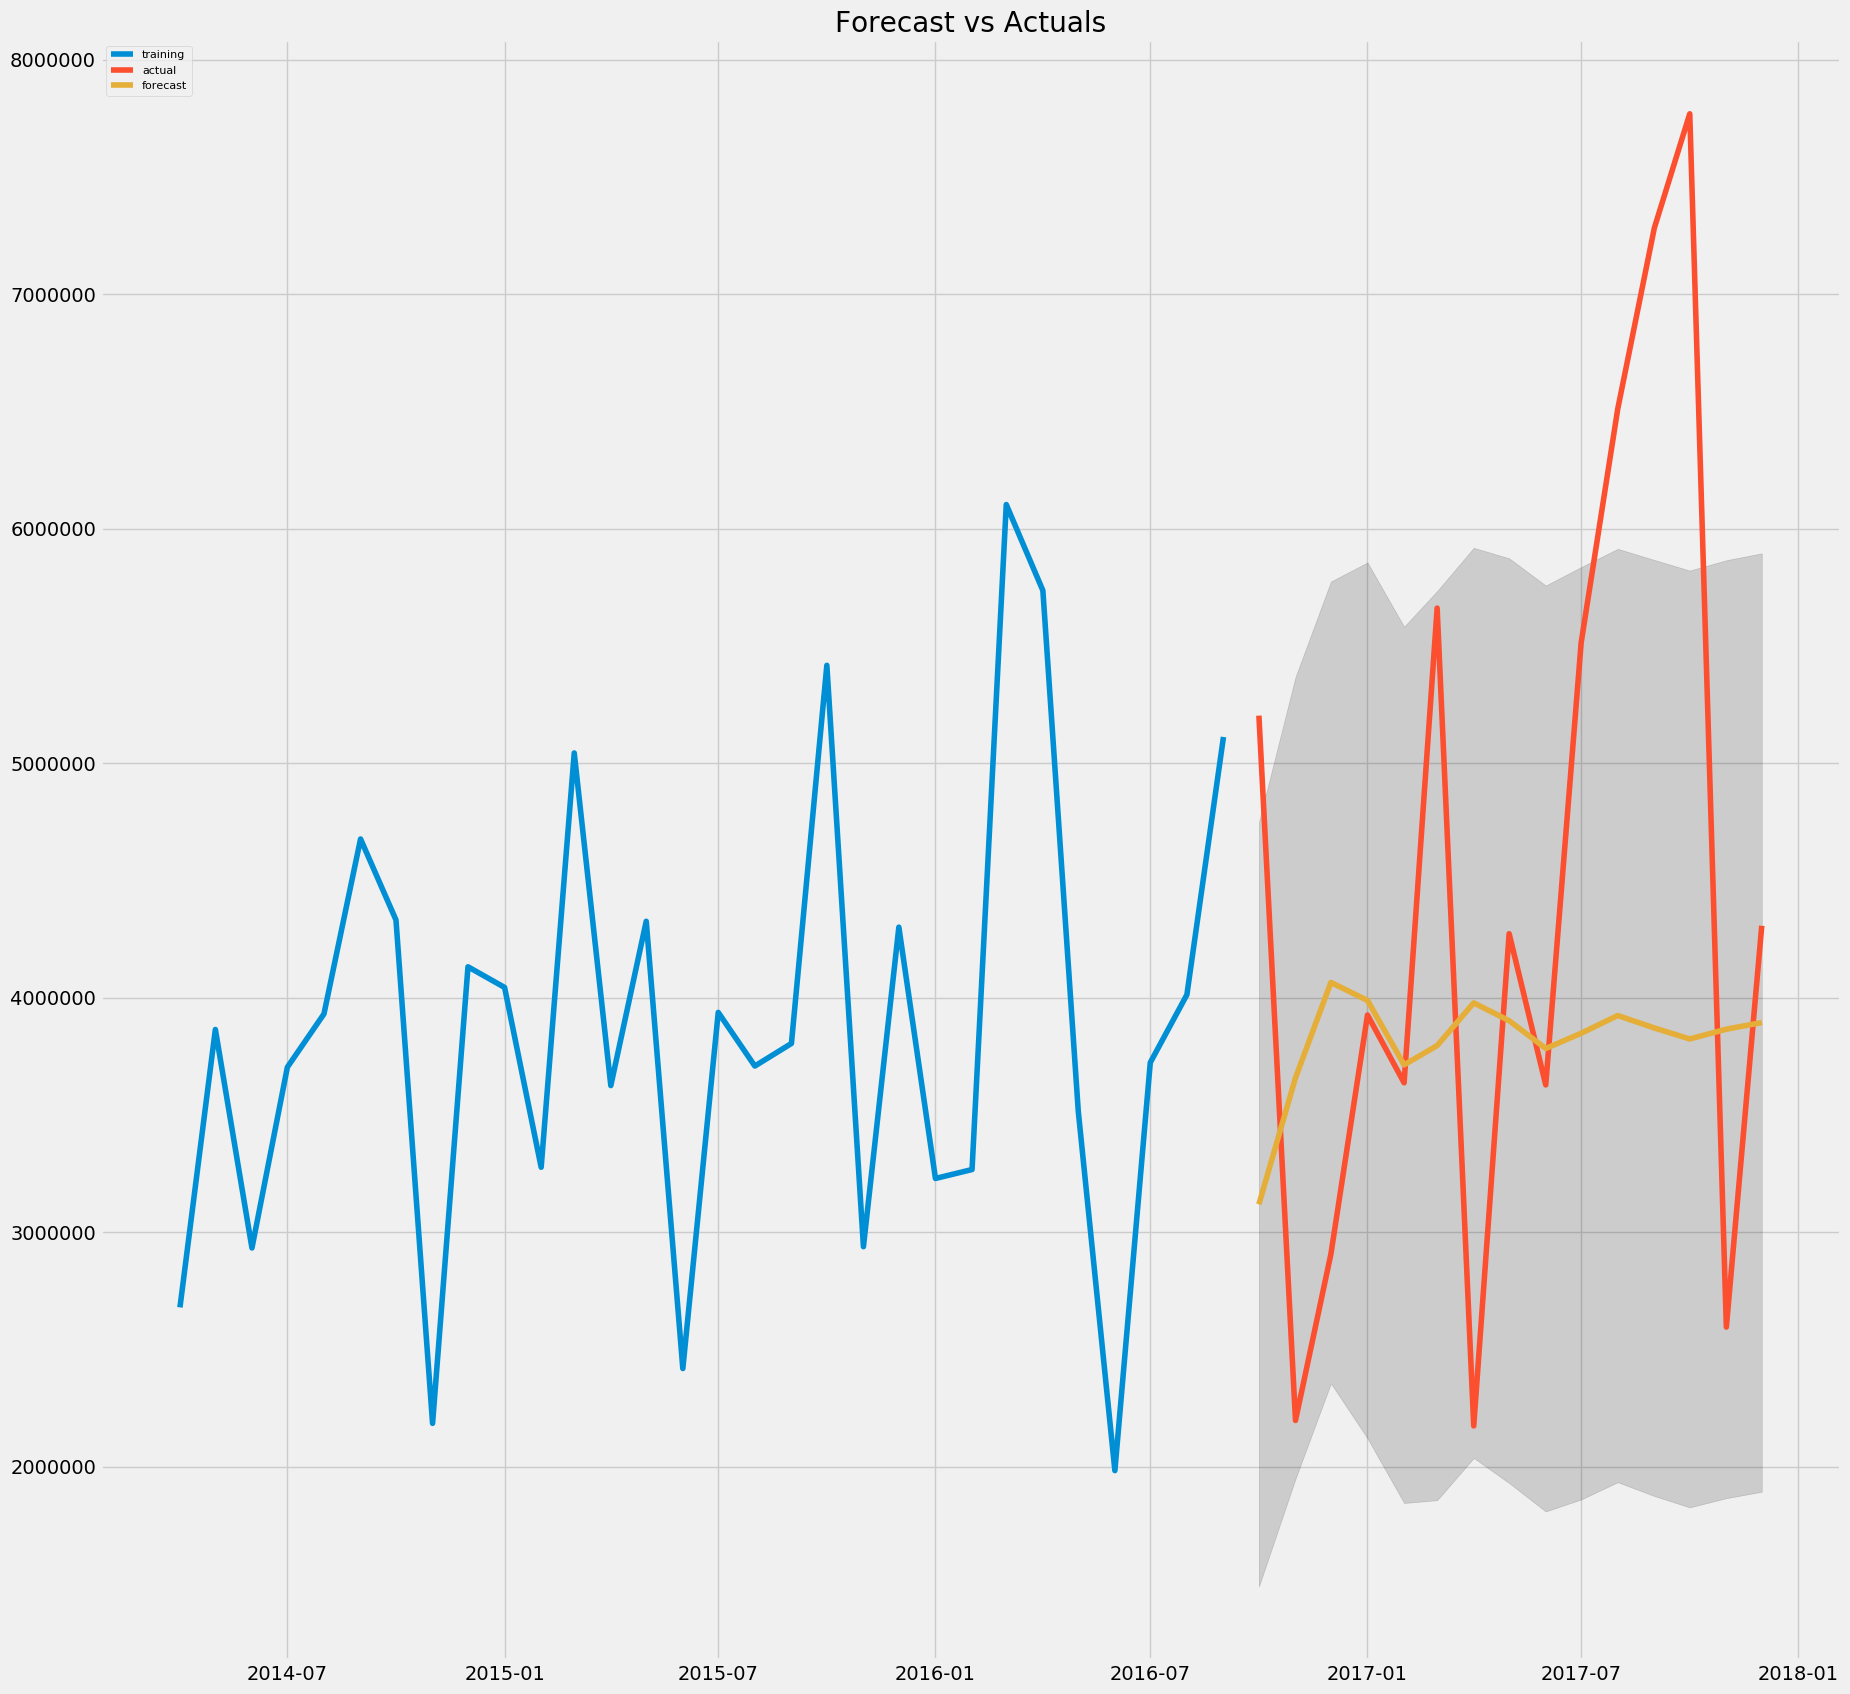

In [84]:
model = ARIMA(train, order=(2,0,3))  
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [83]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(Mum_Mix.sales, order=(2,0,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   45
Model:                     ARMA(2, 3)   Log Likelihood                -693.873
Method:                       css-mle   S.D. of innovations        1193283.482
Date:                Sat, 11 Sep 2021   AIC                           1401.746
Time:                        11:57:39   BIC                           1414.393
Sample:                    04-01-2014   HQIC                          1406.461
                         - 12-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.079e+06   1.87e+05     21.808      0.000    3.71e+06    4.45e+06
ar.L1.sales     0.8493      0.203      4.188      0.000       0.452       1.247
ar.L2.sales    -0.8865      0.224     -3.950    

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
